
[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       152
           1       0.67      0.18      0.29        98

    accuracy                           0.64       250
   macro avg       0.65      0.56      0.53       250
weighted avg       0.65      0.64      0.58       250


Accuracy Score: 0.644


C:\Users\sbmoon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sbmoon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sbmoon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sbmoon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sbmoon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sbmoon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51649 missing fr

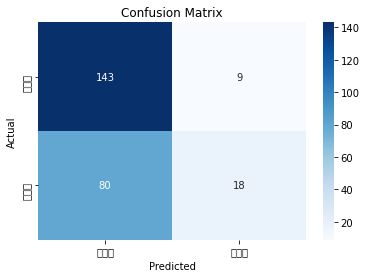


Top Positive Features:
     Feature  Coefficient
2956     워라밸     1.623088
689       급여     1.190700
2965    워라밸이     1.128670
2968     워라벨     1.055441
1388      많이     0.925068
2569      않음     0.919312
2805     연봉이     0.834818
1142   대체적으로     0.833994
2144     서울역     0.797936
4707      휴가     0.776482


In [8]:
!pip install pandas scikit-learn matplotlib seaborn openpyxl soynlp

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from soynlp.tokenizer import LTokenizer

# Step 1: Load and preprocess data
file_path = r"C:\Users\sbmoon\Desktop\Untitled Folder\dataset.xlsx"  
df = pd.read_excel(file_path)

# Ensure data integrity
df.dropna(subset=['status', 'advantage'], inplace=True)  # Remove rows with missing values

# Encode status: 전직원 (former) -> 0, 현직원 (current) -> 1
df['status_encoded'] = df['status'].map({'전직원': 0, '현직원': 1})

# Step 2: Tokenization using SoyNLP
# Initialize LTokenizer (lightweight tokenizer)
tokenizer = LTokenizer()

def tokenize_korean(text):
    tokens = tokenizer.tokenize(text)
    return " ".join(tokens)

df['tokenized_advantage'] = df['advantage'].apply(tokenize_korean)

# Step 3: Split data into train and test sets
X = df['tokenized_advantage']
y = df['status_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Text vectorization using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # No stop-words for Korean; handle all tokens
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Step 5: Train a Logistic Regression classifier
model = LogisticRegression(random_state=42, max_iter=10000)
model.fit(X_train_tfidf, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test_tfidf)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['전직원', '현직원'], yticklabels=['전직원', '현직원'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 7: Analyze important features
feature_names = tfidf.get_feature_names_out()
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
top_features = feature_importance.sort_values(by='Coefficient', ascending=False).head(10)

print("\nTop Positive Features:")
print(top_features)
